# 데이터 불러오기 및 확인하기

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
import pandas as pd

df = pd.read_csv('titanic.csv')

- Survived: 생존 여부 (0 = 사망, 1 = 생존)
- Pclass: 티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)
- Name: 승객 이름
- Sex: 성별
- Age: 나이
- SibSp: 함께 탑승한 형제자매 또는 배우자의 수
- Parch: 함께 탑승한 부모 또는 자녀의 수
- Fare: 운임 요금
- Cabin: 객실 번호
- Embarked: 탑승한 항구 (C = Cherbourg, Q = Queenstown, S = Southampton)


In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 데이터 전처리

In [7]:
df = df.drop(columns=['PassengerId', 'Ticket'])
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C


In [8]:
# 각 컬럼의 결측치 개수를 확인
df.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
# Cabin의 유니크한 값들을 출력
print(df['Cabin'].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [10]:
# Cabin 컬럼을 Drop할지 말지 고민
# Cabin 컬럼의 결측치가 너무 많고, 유니크한 값들이 많아 분석에 큰 도움이 되지 않을 것으로 판단하여 Drop하기로 결정
df = df.drop(columns=['Cabin'])

In [11]:
# age 컬럼의 결측치를 어떻게 처리할지 고민해보자.
# 1. 결측치를 제거하는 방법이 있다. 하지만, age 컬럼의 결측치가 177개로 전체 데이터의 약 20%를 차지하므로, 이 방법은 데이터 손실이 크다.
# 2. 결측치를 평균값으로 대체하는 방법이 있다. 하지만, 평균값으로 대체하면 데이터의 분포가 왜곡될 수 있다.
# 3. 결측치를 중앙값으로 대체하는 방법이 있다. 중앙값은 극단값의 영향을 받지 않으므로, 데이터의 분포를 유지할 수 있다.
# 4. 결측치를 예측 모델을 사용하여 대체하는 방법이 있다. 이 방법은 가장 정확할 수 있지만, 추가적인 모델링 작업이 필요하다.
# 5. name 컬럼의 mr, mrs 등 이니셜을 추출한 정보와 사망 여부, 나이, 성별을 참고하여 나이 결측치를 채우는 방법이 있다.
#    이 방법은 각 그룹의 특성을 반영하여 보다 정확한 나이 값을 추정할 수 있다.

# Name 컬럼에서 이니셜을 추출
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [12]:
# 유니크한 title은 대중적인 title로 편입시켜
# 대중적인 title로 편입시키기 위한 매핑 딕셔너리 생성
title_mapping = {
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs', 'Lady': 'Mrs', 'Countess': 'Mrs', 'Dona': 'Mrs',
    'Dr': 'Mr', 'Rev': 'Mr', 'Col': 'Mr', 'Major': 'Mr', 'Capt': 'Mr', 'Sir': 'Mr', 'Jonkheer': 'Mr', 'Don': 'Mr'
}

# title 컬럼의 값을 매핑 딕셔너리를 사용하여 대중적인 title로 변환
df['Title'] = df['Title'].replace(title_mapping)


In [13]:
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [14]:
# 각 Title, Sex, Survived 그룹별로 Age의 중앙값을 계산
age_medians = df.groupby(['Title', 'Sex', 'Survived'])['Age'].median()

# 결측치를 그룹별 중앙값으로 채우기
def fill_age(row):
    # 만약 Age가 결측치라면
    if pd.isnull(row['Age']):
        # 해당 그룹의 중앙값으로 채운다
        return age_medians[row['Title'], row['Sex'], row['Survived']]
    else:
        # 결측치가 아니라면 원래 값을 유지한다
        return row['Age']

# apply 함수를 사용하여 각 행에 대해 fill_age 함수를 적용
df['Age'] = df.apply(fill_age, axis=1)

In [15]:
# name 컬럼을 Drop하기로 결정
df = df.drop(columns=['Name'])

In [16]:
# 성별을 숫자로 변환
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


# 시각화

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,Mr
1,1,1,1,38.0,1,0,71.2833,C,Mrs
2,1,3,1,26.0,0,0,7.9250,S,Miss
3,1,1,1,35.0,1,0,53.1000,S,Mrs
4,0,3,0,35.0,0,0,8.0500,S,Mr


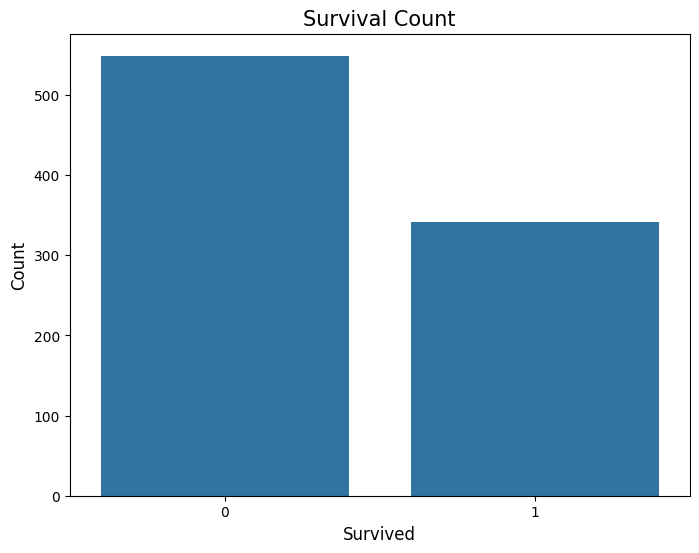

In [21]:
# 생존 비율을 시각화하기 위해 seaborn의 countplot을 사용
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Survived')

# 그래프 제목과 축 레이블 추가
plt.title('Survival Count', fontsize=15)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 그래프를 화면에 출력
plt.show()


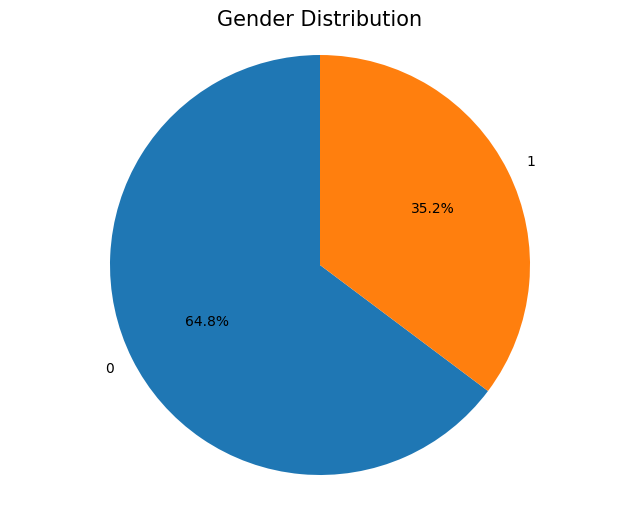

In [22]:
# 성별 비율을 시각화하기 위해 matplotlib의 pie chart를 사용
plt.figure(figsize=(8, 6))

# 성별 데이터의 비율 계산
gender_counts = df['Sex'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

# 파이차트 생성
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# 그래프 제목 추가
plt.title('Gender Distribution', fontsize=15)

# 파이차트를 화면에 출력
plt.axis('equal')  # 파이차트를 원형으로 유지
plt.show()



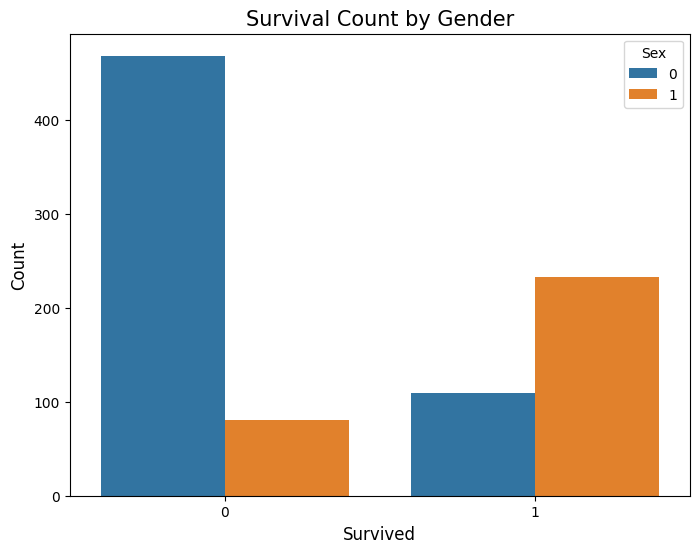

In [23]:
# 사망과 성별을 동시에 고려하여 시각화하기 위해 seaborn의 countplot을 사용
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Survived', hue='Sex')

# 그래프 제목과 축 레이블 추가
plt.title('Survival Count by Gender', fontsize=15)
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 그래프를 화면에 출력
plt.show()


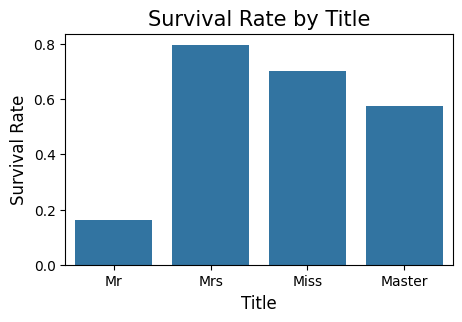

In [24]:
# 각 타이틀의 생존 비율을 시각화하기 위해 seaborn의 barplot을 사용
plt.figure(figsize=(5, 3))
sns.barplot(data=df, x='Title', y='Survived', ci=None)  # ci=None으로 에러바 제거

# 그래프 제목과 축 레이블 추가
plt.title('Survival Rate by Title', fontsize=15)
plt.xlabel('Title', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

# 그래프를 화면에 출력
plt.show()



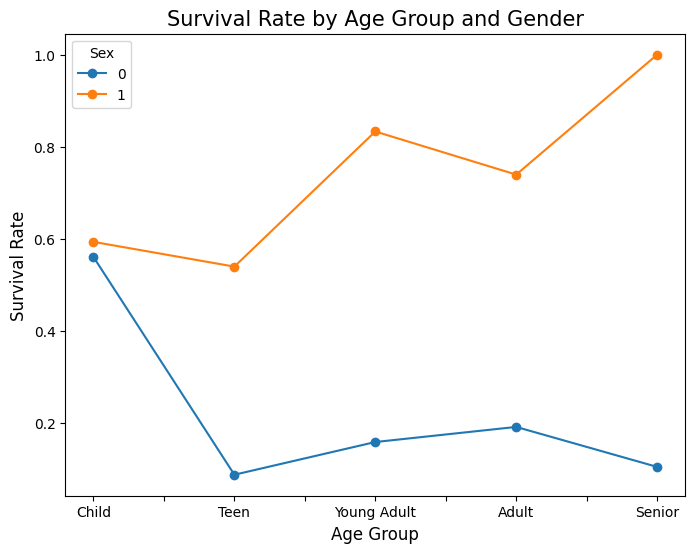

In [25]:
# 연령대와 성별에 따른 생존율을 시각화하기 위해 연령대를 구분
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# 각 연령대와 성별의 생존율을 계산 및 시각화
df.groupby(['AgeGroup', 'Sex'])['Survived'].mean().unstack().plot(kind='line', marker='o', figsize=(8, 6))

# 그래프 제목과 축 레이블 추가
plt.title('Survival Rate by Age Group and Gender', fontsize=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

# 그래프를 화면에 출력
plt.show()


In [26]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,0,3,0,22.0,1,0,7.2500,S,Mr,Young Adult
1,1,1,1,38.0,1,0,71.2833,C,Mrs,Adult
2,1,3,1,26.0,0,0,7.9250,S,Miss,Young Adult
3,1,1,1,35.0,1,0,53.1000,S,Mrs,Young Adult
4,0,3,0,35.0,0,0,8.0500,S,Mr,Young Adult
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Mr,Young Adult
887,1,1,1,19.0,0,0,30.0000,S,Miss,Young Adult
888,0,3,1,18.0,1,2,23.4500,S,Miss,Teen
889,1,1,0,26.0,0,0,30.0000,C,Mr,Young Adult


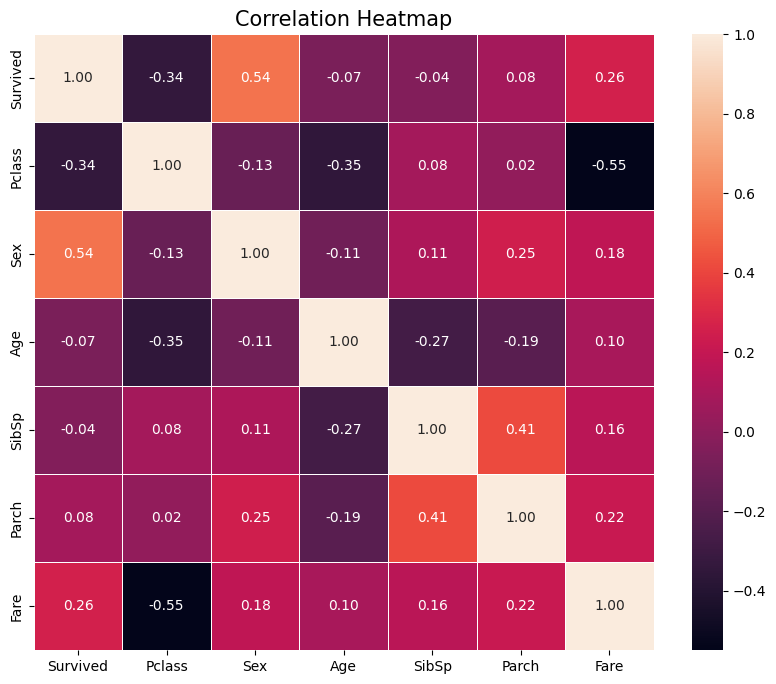

In [27]:
# 생존과 다른 컬럼간의 상관관계를 히트맵으로 표현
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr(numeric_only=True)

# 히트맵을 그리기
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)

# 그래프 제목 추가
plt.title('Correlation Heatmap', fontsize=15)

# 그래프를 화면에 출력
plt.show()


In [28]:
# 생존과 상관관계가 높은 컬럼들을 표 형태로 내림차순으로 정렬
correlation_with_survived = correlation_matrix['Survived'].abs().sort_values(ascending=False)

# 결과를 데이터프레임으로 변환
correlation_df = correlation_with_survived.reset_index()
correlation_df.columns = ['Feature', 'Correlation with Survived']

# 결과 출력
correlation_df


,Feature,Correlation with Survived
0,Survived,1.000000
1,Sex,0.543351
2,Pclass,0.338481
3,Fare,0.257307
4,Parch,0.081629
5,Age,0.070416
6,SibSp,0.035322
